In [2]:
from imports import *
import astropy.io.fits as fits
%matplotlib inline

((1049, 4196), (1024, 4096))

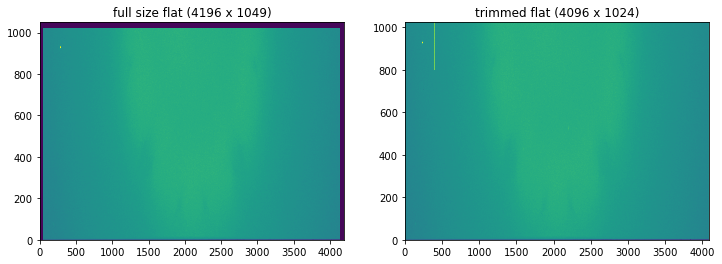

In [15]:
# get one flat 
#flat_img1 = fits.open('/Users/ryancloutier/Research/Tierras/incoming/20220331/20220331.0459.FLAT001.fit')[1].data.astype(float)
flat_img1 = fits.open('/data/tierras/incoming/20220331/20220331.0459.FLAT001.fit')[1].data.astype(float)
# define overscan and smear regions so they won't contribute to the median operation
x,y = np.meshgrid(np.arange(1024), np.arange(50,4196-50))
flat_img1_trimmed = flat_img1[x,y].T

vmin, vmax = 0, 4e4
plt.figure(figsize=(12,4))
plt.subplot(121), plt.pcolormesh(flat_img1, vmin=vmin, vmax=vmax), plt.title('full size flat (%i x %i)'%flat_img1.shape[::-1])
plt.subplot(122), plt.pcolormesh(flat_img1_trimmed, vmin=vmin, vmax=vmax), plt.title('trimmed flat (%i x %i)'%flat_img1_trimmed.shape[::-1])
flat_img1.shape, flat_img1_trimmed.shape

(1024, 4096)

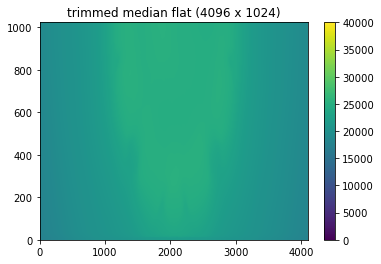

In [16]:
# compute median of the trimmed flat image (i.e. no NaNs)
medimg_trimmed = median_filter(flat_img1_trimmed, size=49)
plt.pcolormesh(medimg_trimmed, vmin=vmin, vmax=vmax), plt.title('trimmed median flat (%i x %i)'%medimg_trimmed.shape[::-1])
plt.colorbar()
medimg_trimmed.shape

(1049, 4196)

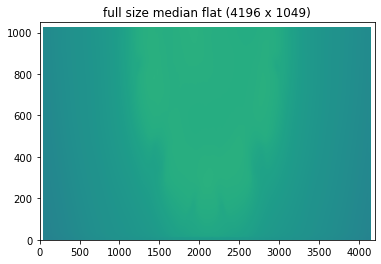

In [7]:
# add NaNs to the edges of the median image so that it's the same size as the original flat
medimg = np.zeros_like(flat_img1) + np.nan
medimg[x,y] = medimg_trimmed.T
plt.pcolormesh(medimg, vmin=vmin, vmax=vmax), plt.title('full size median flat (%i x %i)'%medimg.shape[::-1])
medimg.shape

In [12]:
# Trim and print image to ensure no nans remain at the edges
img_trim = medimg[1:1024,51:4146]
img_trim

array([[17639., 17638., 17635., ..., 17911., 17909., 17907.],
       [17640., 17640., 17640., ..., 17909., 17907., 17907.],
       [17642., 17640., 17640., ..., 17911., 17909., 17909.],
       ...,
       [18972., 18974., 18972., ..., 19141., 19141., 19136.],
       [18968., 18970., 18969., ..., 19137., 19138., 19133.],
       [18969., 18972., 18969., ..., 19139., 19139., 19133.]])

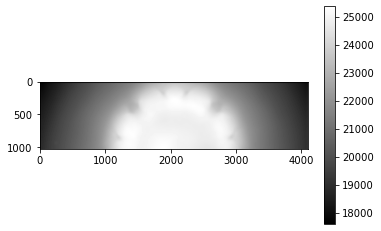

In [13]:
plt.imshow(img_trim,cmap='gray',interpolation='none')
plt.colorbar()
plt.show()

In [ ]:
hdu = fits.open(fs[0])
hdu0 = fits.PrimaryHDU(header=hdu[0].header)
hdu1 = fits.ImageHDU(np.nanmedian(master_flat[:,0],0), header=hdu[1].header)
hdu2 = fits.ImageHDU(np.nanmedian(master_flat[:,1],0), header=hdu[2].header)
hdu = fits.HDUList([hdu0, hdu1, hdu2])
hdu.writeto('%s/MASTERFLAT_mednorm.fit'%path, overwrite=True)